In [2]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


In [3]:

df = pd.read_csv(r"IRIS.csv")

#Display the first few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
#Display the whole dataframe in tabular form
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Display the description of the dataset
display(df.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#1. Display total number of data points
data_count = len(df.axes[0])
print("a. Total no. of data points: " + str(data_count))

a. Total no. of data points: 150


In [8]:
#2. Display total no. of classes
col_count = len(df.axes[1])
class_count = df.nunique(axis=0)[col_count - 1]
print("\nb. No. of classes: " + str(class_count))


b. No. of classes: 3


In [9]:
#3. Display data distribution
feature_names = []
class_names = []
class_data_count = []

feature_names = df.columns.tolist() #column names are the feature names
class_names = df[feature_names[col_count-1]].unique() #class names are the unique values in the last column

#get the count of data points for each class using the groupby method
for i in range(class_count) :
    class_data_count.append(df.groupby(feature_names[col_count-1]).size()[class_names[i]])

print("\nc. Data Distribution:")
for i in range(class_count) : 
    print(class_names[i] + " : " + str(class_data_count[i]))


c. Data Distribution:
Iris-setosa : 50
Iris-versicolor : 50
Iris-virginica : 50


In [10]:
#4. Display the feature count
feature_count = col_count - 1
print("\nd. No. of features: " + str(feature_count))


d. No. of features: 4


In [11]:
#5. Display the minimum and maximum values of each feature
min_values = []
max_values = []
for i in range(feature_count) :
    min_values.append(df[feature_names[i]].min())
    max_values.append(df[feature_names[i]].max())
print("\ne. Min_max of the features:")
for i in range(feature_count) :
    print(feature_names[i] + " : " + str(min_values[i]) + " : " + str(max_values[i]))



e. Min_max of the features:
sepal_length : 4.3 : 7.9
sepal_width : 2.0 : 4.4
petal_length : 1.0 : 6.9
petal_width : 0.1 : 2.5


In [12]:
#6. Display the average and variance values of each feature
mean_values = []
var_values = []
for i in range(feature_count) :
    mean_values.append(df[feature_names[i]].mean())
    var_values.append(df[feature_names[i]].var())
print("\nf. Mean & variance of the features:")
for i in range(feature_count) :
    print(feature_names[i] + " : " + str(mean_values[i]) + " : " + str(var_values[i]))


f. Mean & variance of the features:
sepal_length : 5.843333333333334 : 0.6856935123042507
sepal_width : 3.0540000000000003 : 0.1880040268456376
petal_length : 3.758666666666666 : 3.113179418344519
petal_width : 1.1986666666666668 : 0.582414317673378


In [13]:
#7. Display the classwise minimum and maximum values of each feature
print("\ng. Classwise min_max of each feature:")
grouped_data = df.groupby(feature_names[col_count-1])
for i in range (class_count) :
    print("\n\nClass name :" + class_names[i]+"\n-------------------------------------")
    data_group = grouped_data.get_group(class_names[i])
    group_min_values = []
    group_max_values = []
    for i in range(feature_count) :
        group_min_values.append(data_group[feature_names[i]].min())
        group_max_values.append(data_group[feature_names[i]].max())
    for i in range(feature_count) :
        print("\t" + feature_names[i] + " : " + str(group_min_values[i]) + " : " + str(group_max_values[i]))


g. Classwise min_max of each feature:


Class name :Iris-setosa
-------------------------------------
	sepal_length : 4.3 : 5.8
	sepal_width : 2.3 : 4.4
	petal_length : 1.0 : 1.9
	petal_width : 0.1 : 0.6


Class name :Iris-versicolor
-------------------------------------
	sepal_length : 4.9 : 7.0
	sepal_width : 2.0 : 3.4
	petal_length : 3.0 : 5.1
	petal_width : 1.0 : 1.8


Class name :Iris-virginica
-------------------------------------
	sepal_length : 4.9 : 7.9
	sepal_width : 2.2 : 3.8
	petal_length : 4.5 : 6.9
	petal_width : 1.4 : 2.5


In [ ]:
#8. Display the classwise mean and variance values of each feature
print("\nh. Classwise mean & variance of each feature:")
for i in range (class_count) :
    print("\n\nClass name :" + class_names[i]+"\n-------------------------------------")
    data_group = grouped_data.get_group(class_names[i])
    group_mean_values = []
    group_var_values = []
    for i in range(feature_count) :
        group_mean_values.append(data_group[feature_names[i]].mean())
        group_var_values.append(data_group[feature_names[i]].var())
    for i in range(feature_count) :
        print("\t" + feature_names[i] + " : " + str(group_mean_values[i]) + " : " + str(group_var_values[i]))

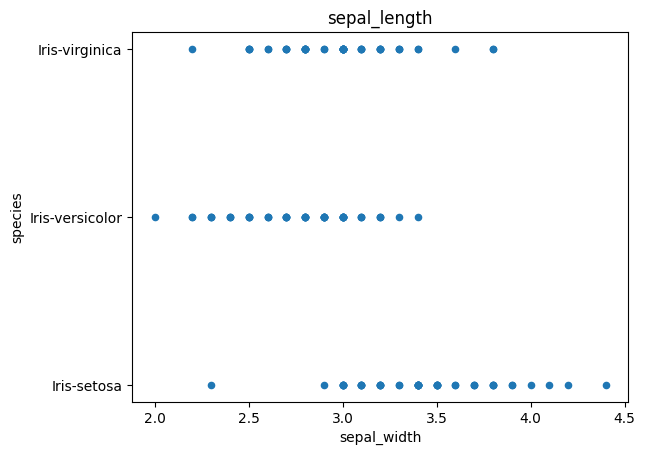

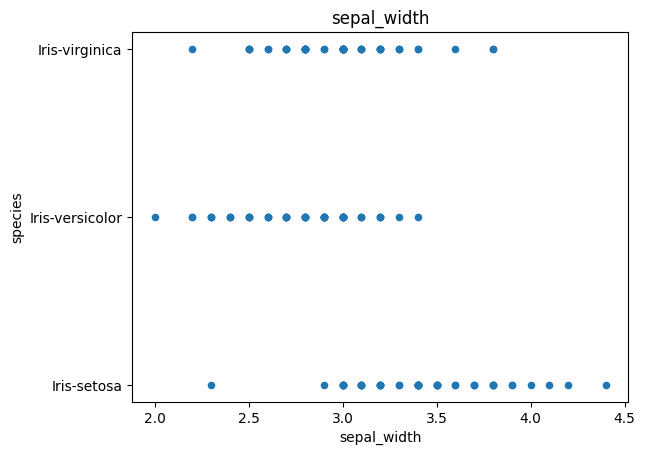

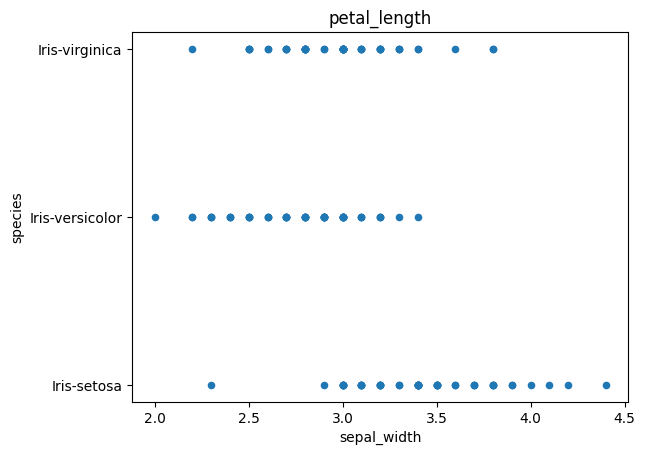

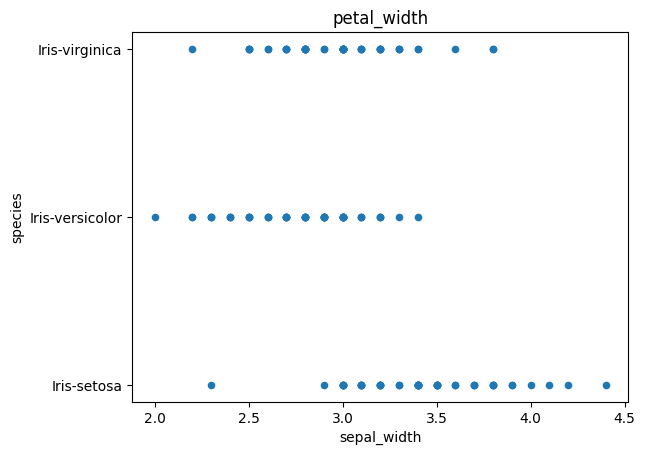



10. Training data (80%)
------------------------
       sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean       5.830833     3.066667      3.720000     1.187500
std        0.819079     0.437205      1.774118     0.769215
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.750000     3.000000      4.300000     1.300000
75%        6.400000     3.325000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


10. Test data (20%)
------------------------
       sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       5.893333     3.003333      3.913333     1.243333
std        0.875700     0.422214      1.746076     0.749567
min        4.400000     2.000000      1.300000     0.200000
25%        5.400000     2.800000      1.750000     0.325000
50

In [14]:
#9. Plotting
for i in range (feature_count) :
    df.plot(x=feature_names[1], y=feature_names[col_count-1], kind='scatter', title=feature_names[i])
plt.show()

#10. Splitting
df_trng = df.sample(frac = 0.8)
df_tst = df.drop(df_trng.index)
print("\n\n10. Training data (80%)\n------------------------")
print(df_trng.describe())
print("\n\n10. Test data (20%)\n------------------------")
print(df_tst.describe())